In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Public modules
import os
import wfdb
import importlib
import numpy as np

# Custom modules
import preprocessing_utils

In [3]:
# Explicit reloading of modules
importlib.reload(preprocessing_utils)

<module 'preprocessing_utils' from '/media/minx/Data/KDE_Home/Documents/Projects/arrhythmia-detection/preprocessing_utils.py'>

In [5]:
test_file_path = "data_original/vfdb/420"
test_record_name = "test"
test_target_path = "data_processed/"
test_test_path = "data_processed/test_test"

In [6]:
record = wfdb.rdrecord(test_file_path, sampfrom=81000, sampto=81500)
annotations = wfdb.rdann(test_file_path, "atr")

In [7]:
fmt = record.fmt
fs_target = 200

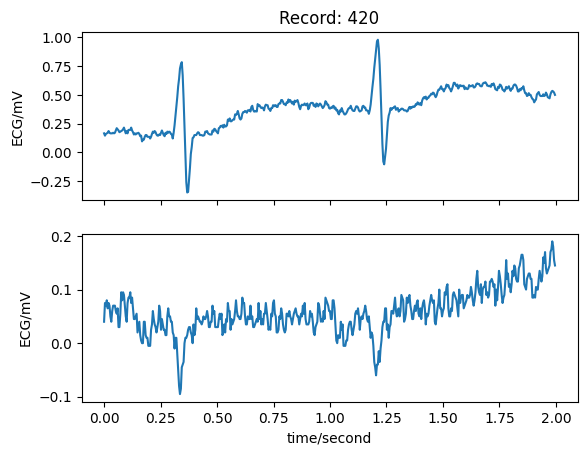

In [8]:
wfdb.plot_wfdb(record)

In [12]:
resampled_signal, resampled_annotations = preprocessing_utils.resample_record_and_annotations(record, annotations, fs_target)
signal, annotations = preprocessing_utils.normalize_signal_and_center(resampled_signal), resampled_annotations

signal = preprocessing_utils.cutoff_freqs_fir_filter(signal)
signal = preprocessing_utils.remove_baseline_wander_wavelets(signal)

In [13]:
wfdb.wrsamp(record_name=test_record_name + "_test", fs=fs_target, units=record.units,
            sig_name=['ECG CH1', 'ECG CH2'], p_signal=signal, fmt=fmt,
            write_dir=test_target_path)

wfdb.wrann(test_record_name + "_test", extension='atr', sample=annotations.sample,
           symbol=annotations.symbol, fs=fs_target,
           write_dir=test_target_path)

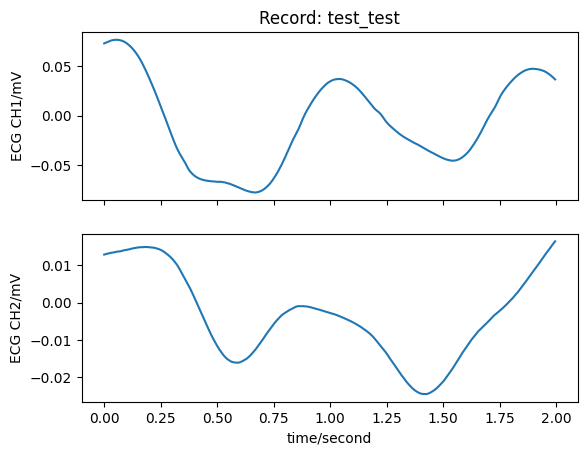

In [14]:
tested_record = wfdb.rdrecord(test_test_path)
tested_annotations = wfdb.rdann(test_test_path, "atr")
wfdb.plot_wfdb(tested_record)